In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [2]:
df = pd.read_csv("Quarterly_Census_of_Employment_and_Wages__QCEW_.csv") 
data = df[(df["Quarter"]=="Annual") & (df["Industry Name"]!="Total, All Industries")] 

In [3]:
### Area Type & Establishments ###

Text(0.5, 1.0, 'Establishments in California Statewide vs US Nationwide in 2021')

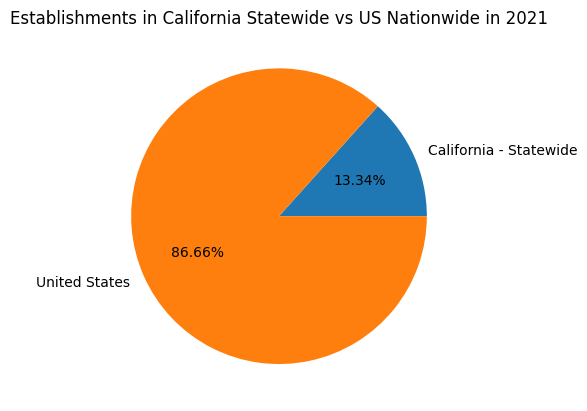

In [6]:
# United States vs California - Statewide
area_esta = data[(data["Year"]==2021) & ((data["Area Type"]=="United States") | (data["Area Type"]=="California - Statewide"))]
count = area_esta[["Establishments", "Area Type"]].groupby(["Area Type"]).sum()
plt.pie(count["Establishments"], labels=count.index, autopct="%.2f%%")
plt.title("Establishments in California Statewide vs US Nationwide in 2021")

Text(0.5, 1.0, 'Establishments of Different Counties in California in 2021')

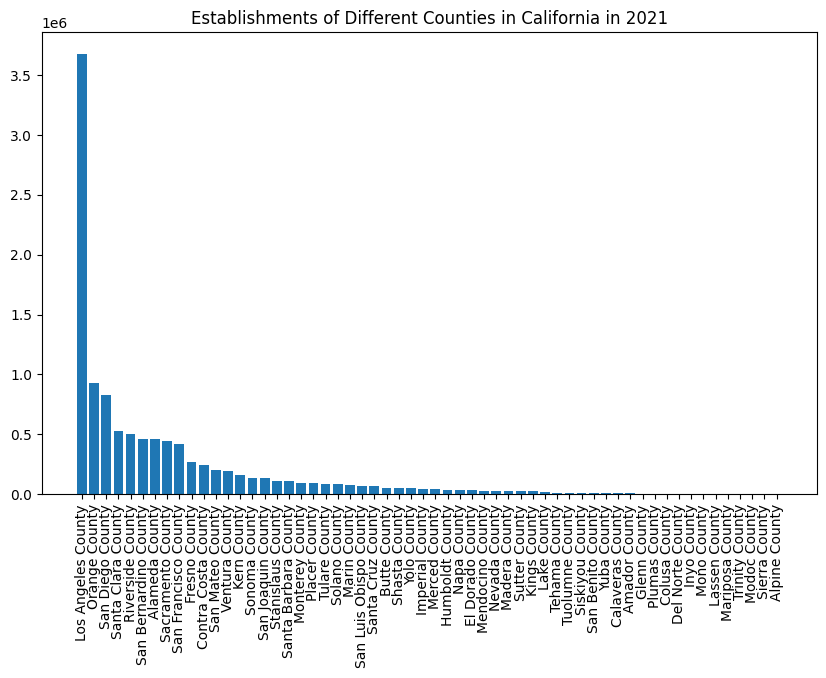

In [12]:
# different counties
county_esta = data[(data["Year"]==2021) & (data["Area Name"]!="California") & (data["Area Name"]!="United States")]
count = county_esta[["Establishments", "Area Name"]].groupby(["Area Name"]).sum()
xl=list(count.index)
yl=list(map(np.float_, count.values))
x_y = []
for i in range(len(list(count.index))):
    x_y.append((xl[i],yl[i]))
x_y = sorted(x_y, key=lambda x_y:x_y[1], reverse=True)
x = []
y = []
for i in range(len(x_y)):
    x.append(x_y[i][0])
    y.append(x_y[i][1])
x = np.array(x)
y = np.array(y)
fig = plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xticks()
plt.title("Establishments of Different Counties in California in 2021")

In [186]:
### Ownership & Establishment ###

Text(0.5, 1.0, 'Average Number of Establishments of Different Ownerships in 2021')

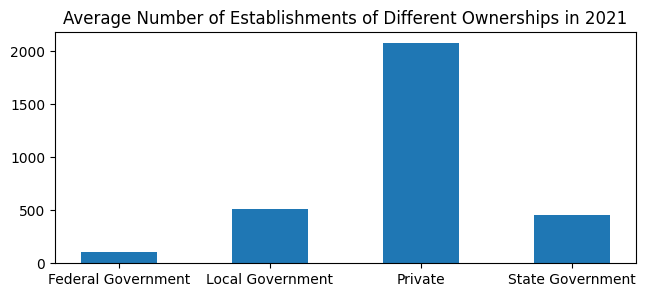

In [10]:
own_esta = data[(data["Year"]==2021) & (data["Area Type"]!="California - Statewide") & ((data["Ownership"]=="Federal Government") | (data["Ownership"]=="Local Government") | (data["Ownership"]=="Private") | (data["Ownership"]=="State Government"))]
count = own_esta[["Establishments", "Ownership"]].groupby(["Ownership"]).mean()
x = count.index
y = np.array(list(map(np.float_, count.values)))
fig = plt.figure(figsize=(7.5,3))
plt.bar(x,y,width=0.5)
plt.title("Average Number of Establishments of Different Ownerships in 2021")

In [188]:
### Year & Establishments ###

Text(0.5, 1.0, 'Sum of Establishments by Year in California')

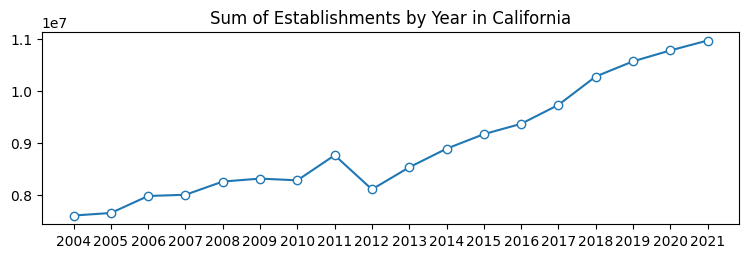

In [17]:
y_esta = data[(data["Area Type"]=="County")]
count = y_esta[["Establishments", "Year"]].groupby(["Year"]).sum()
fig = plt.figure(figsize=(9,2.5))
x = np.array(list(map(np.str_, count.index)))
y = np.array(list(map(np.int_, count.values)))
plt.plot(x,y,marker='o',mfc='w')
plt.title("Sum of Establishments by Year in California")

In [ ]:
### Correlations ###

Text(0.5, 1.0, 'Avg of Average Monthly Employment by Year in California')

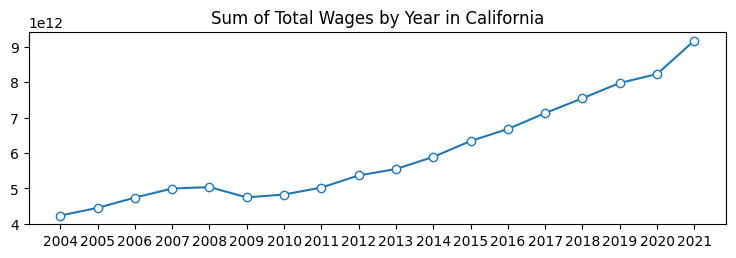

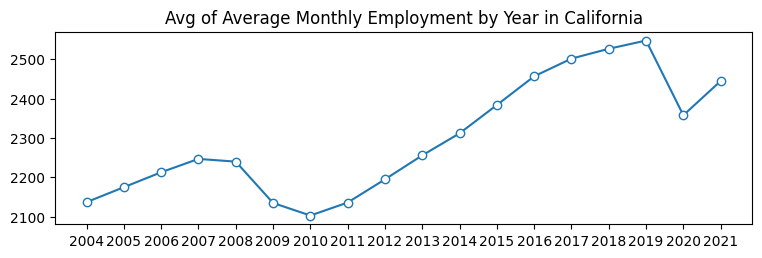

In [18]:
count_tw = y_esta[["Total Wages (All Workers)", "Year"]].groupby(["Year"]).sum()
y_tw = np.array(list(map(np.int_, count_tw.values)))
fig = plt.figure(figsize=(9,2.5))
plt.plot(x,y_tw,marker='o',mfc='w')
plt.title("Sum of Total Wages by Year in California")

count_ae = y_esta[["Average Monthly Employment", "Year"]].groupby(["Year"]).mean()
y_ae = np.array(list(map(np.int_, count_ae.values)))
fig = plt.figure(figsize=(9,2.5))
plt.plot(x,y_ae,marker='o',mfc='w')
plt.title("Avg of Average Monthly Employment by Year in California")

                            Establishments  Total Wages  \
Establishments                    1.000000     0.979327   
Total Wages                       0.979327     1.000000   
Average Monthly Employment        0.829266     0.859342   

                            Average Monthly Employment  
Establishments                                0.829266  
Total Wages                                   0.859342  
Average Monthly Employment                    1.000000  


<Figure size 600x900 with 0 Axes>

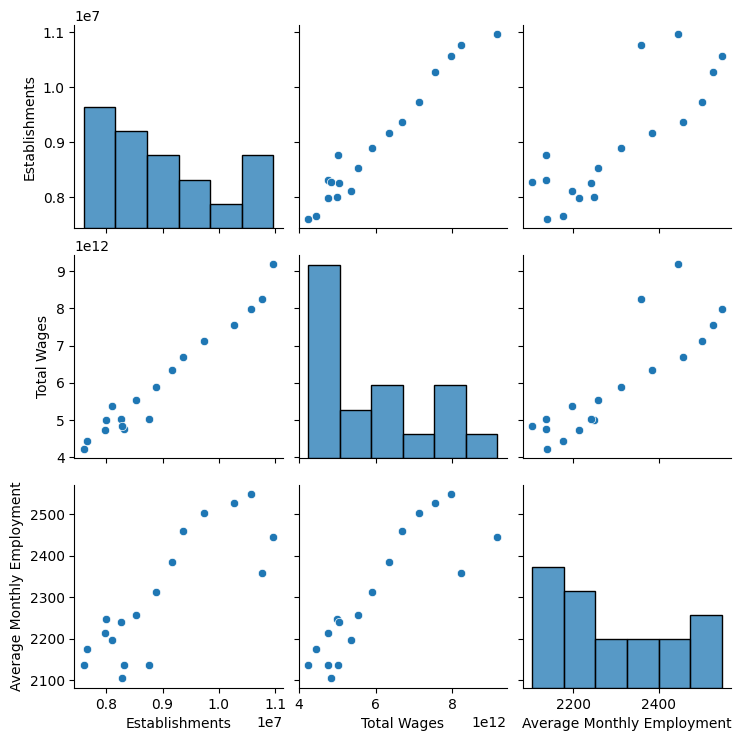

In [16]:
# between establishments & total wages & average monthly employment
rdic = {}
rdic["Year"] = list(map(np.str_, count.index))
rdic["Establishments"] = [i[0] for i in count.values.tolist()]
rdic["Total Wages"] = [int(i[0]) for i in count_tw.values.tolist()]
rdic["Average Monthly Employment"] = [i[0] for i in count_ae.values.tolist()]

rdf = pd.DataFrame(rdic)
fig = plt.figure(figsize=(6,9))
sns.pairplot(rdf)
print(rdf.corr())